In [1]:
# run `include("./developer/revice.jl")`
using Pkg
Pkg.instantiate()
# Pkg.add("Revise")
using Revise
Pkg.activate("../")
using Antique
using Plots

[ Info: Precompiling Revise [295af30f-e4ad-537b-8983-00126c2a3abe]
  Activating project at `C:\Users\user\Desktop\GitHub\Antique.jl`
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


### Delta function potential

In [2]:
DP = DeltaPotential(α=0.1,m=0.5, ℏ=0.1)

DeltaPotential(0.1, 0.5, 0.1)

In [3]:
E(DP)

-0.25

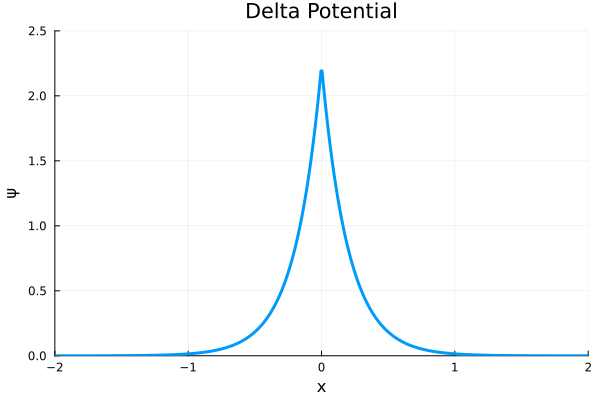

In [4]:
x = LinRange(-2,2,500);
ψδ = ψ(DP,x);

plot(x,ψδ,linewidth=3)
plot!(xlim=[-2,2],ylim=[0,2.5],legend=false)
plot!(xlabel="x",ylabel="ψ",title="Delta Potential")

In [5]:
using QuadGK
using Printf

[ Info: Precompiling QuadGK [1fd47b50-473d-5c70-9696-f719f8f3bcdc]


In [6]:
analytical = 1
numerical  = quadgk(x -> conj(ψ(DP, x)) * ψ(DP, x), -Inf, Inf, maxevals=10^3)[1]
acceptance = iszero(analytical) ? isapprox(analytical, numerical, atol=1e-5) : isapprox(analytical, numerical, rtol=1e-5)

true

In [7]:
@printf("%17.12f | %17.12f %s\n", analytical, numerical, acceptance ? "✔" : "✗")

   1.000000000000 |    1.000000000000 ✔


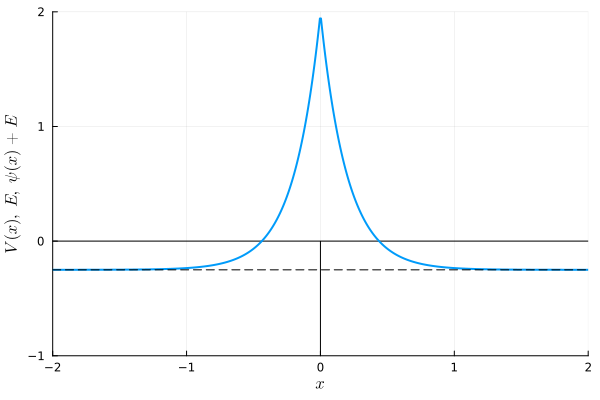

In [8]:
DP = DeltaPotential(α=0.1, m=0.5, ℏ=0.1)
x = LinRange(-2,2,500);

using Plots
plot(xlim=[-2,2], ylim=[-1,2.0], legend=false, xlabel="\$x\$", ylabel="\$V(x),~E,~\\psi(x)+E\$")
plot!([-2,0,0,0,2], [0,0,-1,0,0], lw=1, lc=:black) # plot!(x, x->V(DP,x), lw=1, lc=:black)
plot!(x, x->ψ(DP,x) + E(DP), lw=2, lc=1)
hline!([E(DP)], lw=1, ls=:dash, lc=:black)